In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df = pd.read_csv('dao_maker_launches.csv', sep='\t').drop(['Unnamed: 0', 'level_0'], axis=1)
df = df.set_index('index').reset_index()
df
# change columns' names
# raised money - number only
# roi - number only
# Get the month of launch date
# fill na
# get lenght of each description 
# Description transformations

,index,raised,ROI_ATH,catg,vc,mm,cap_controlled,dao_approve,id,launch_date,platform,total_supply,fear_greed_val,month,desc
0,gamium,"$200,000",43x,Metaverse,DAO Maker,DAO Maker,0.0,0.0,gamium,30/03/22,binance-smart-chain,6.324101e+09,55,3,WHAT IS GAMIUM? Gamium is a web3 and metaverse...
1,adaswap,"$195,000",12x,DeFi,Shima Capital,MarketMaker.io,0.0,0.0,adaswap,05/04/22,ethereum,1.000000e+10,53,4,WHAT IS ADASWAP (ASW)? AdaSwap strives to be t...
2,step-app,"$2,750,000",149x,Move To Earn,NaN,Kairon Labs,1.0,1.0,step-app-fitfi,26/04/22,avalanche,5.000000e+09,27,4,WHAT IS STEP APP (FITFI)? Step App is the next...
3,dragon-sb,"$195,000",9x,Gaming,DnR Labs,NaN,0.0,1.0,dragonsb,15/03/22,binance-smart-chain,9.500000e+07,21,3,WHAT IS DRAGONSB? DragonSB - a product of DRAG...
4,defiato,"$600,000",2x,DeFi,CRC,MarketMaker.io,0.0,1.0,defiato,16/12/20,ethereum,2.500000e+08,92,12,WHAT IS DEFIATO? DeFiato is the next-generatio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,dao-maker,"$3,900,000",87x,Launchpad,NaN,NaN,0.0,0.0,dao-maker,09/02/21,ethereum,2.775240e+08,95,2,WHAT IS DAO MAKER? DAO Maker is building the g...
89,anrkey-x,"$125,000",19x,DeFi,NaN,NaN,0.0,0.0,anrkey-x,18/12/20,ethereum,2.000000e+08,95,12,WHAT IS ANRKEY X? AnRKey X™ is a gDEX (Decentr...
90,plotx,"$250,000",8x,DeFi,NaN,NaN,0.0,0.0,plotx,14/10/20,ethereum,2.000000e+08,53,10,WHAT IS PLOTX ? PlotX is a non-custodial predi...
91,definer,"$96,000",5x,DeFi,NaN,NaN,0.0,0.0,definer,12/10/20,ethereum,1.680000e+08,52,10,WHAT IS DEFINER? DeFiner is a decentralized fi...


In [73]:
# Get the month of public listing
df['month'] = df['launch_date'].apply(lambda x: int(x[3:5]))

In [98]:
# Change the names of columns
columns = ['name', 'money_raised', 'ATH_ROI', 'catg', 'VC', 'MM', 'cap_controlled', 
           'dao_approved', 'cg_id', 'launch_date', 'chain', 'total_supply', 'btc_f&g_index', 'launch_month', 'desc']

df.columns = columns

In [99]:
# cast the money_raised column to int
df['money_raised'] = df['money_raised'].apply(lambda x: int(x[1:].replace(',', '')))

In [100]:
# cast the atH_roi column to int
df['ATH_ROI'] = df['ATH_ROI'].apply(lambda x: int(x[:-1]))

<AxesSubplot:>

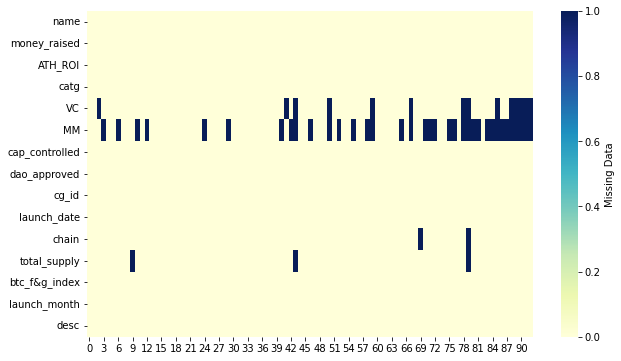

In [101]:
# Find na values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [102]:
# It is reasonable to fill VC and MM column with '0' as the data is not missing
# the NA is data itself
df[['VC', 'MM']] = df[['VC', 'MM']].fillna('0')

In [103]:
# Having a quick look at the projects it turns out that both of them are network itself
# That's why 'own' chain would would be fair
df[df['chain'].isna()]

,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,total_supply,btc_f&g_index,launch_month,desc
69,sienna,800000,9,DeFi,Magnus Capital,Skynet Trading,0.0,1.0,sienna,07/09/21,NaN,10000000.0,79,9,WHAT IS SIENNA NETWORK? Sienna Network is a pr...
79,orao-network,850000,3,Blockchain Service,0,0,0.0,0.0,orao-network,03/05/21,NaN,NaN,61,5,WHAT IS ORAO? ORAO uses a reputation system th...


In [104]:
df['chain'] = df['chain'].fillna('own')

In [105]:
df[df['total_supply'].isna()]

,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,total_supply,btc_f&g_index,launch_month,desc
9,infinity-skies,200000,1,Gaming,Jump,Jump,0.0,1.0,infinity-skies,14/01/22,polygon-pos,NaN,21,1,WHAT IS INFINITY SKIES? Infinity Skies is a bl...
43,marnotaur,100000,20,DeFi,0,0,0.0,0.0,marnotaur,25/10/21,binance-smart-chain,NaN,72,10,WHAT IS MARNOTAUR PROJECT OVERVIEW? Marnotaur ...
79,orao-network,850000,3,Blockchain Service,0,0,0.0,0.0,orao-network,03/05/21,own,NaN,61,5,WHAT IS ORAO? ORAO uses a reputation system th...


In [110]:
# The information about total supply can be easily found on the whitepaper of each project
df.loc[9, 'total_supply'] =  100000000 
df.loc[43, 'total_supply'] =  150000000
df.loc[79, 'total_supply'] =  1000000000

In [164]:
# Create column with lenght of each description
df['desc_len'] = df['desc'].apply(lambda x: len(x))

# Let's check what are the most common words from all descriptions
pd.Series(' '.join(df['desc']).lower().split()).value_counts()[:100].index

Index(['the', 'and', 'to', 'of', 'a', 'is', 'in', 'will', 'for', 'on', 'with',
       'be', 'are', 'their', 'as', 'that', 'by', 'can', 'nft', 'they', 'users',
       'token', 'from', 'this', 'game', 'an', 'what', 'it', 'have', '-', 'or',
       'tokens', 'which', 'all', 'also', 'has', 'you', 'defi', 'crypto',
       'more', 'other', 'platform', 'blockchain', 'players', 'new', 'used',
       'liquidity', 'its', 'market', 'nfts', 'not', 'at', 'revenue',
       'community', 'protocol', 'marketing', 'smart', 'into', 'orion', 'use',
       'through', 'product', 'these', 'but', 'user', 'first', 'games', 'each',
       'data', 'such', 'decentralized', 'earn', 'one', 'your', 'there',
       'strategy', 'gaming', 'where', 'network', 'rewards', 'only', 'them',
       'any', 'trading', 'different', 'assets', 'create', 'social', 'makes',
       'own', 'using', 'when', 'most', 'up', 'digital', 'who', 'economy',
       'how', 'able', 'finance'],
      dtype='object')

In [263]:
# Looks like words 'token'/s, 'marketing' and 'user/s appear pretty often.
# Let's count these word appearance in each project's description 
# It may show the project's importance of marketing and client needs, respectively 

from nltk import word_tokenize
from collections import Counter
from nltk.stem import PorterStemmer


# returns number of steemed number of certain word
def count_word(desc, word):
    tokens = word_tokenize(desc)
    tokens = [word.lower() for word in tokens]

    porter = PorterStemmer()

    stemmed_tokens = [porter.stem(stem) for stem in tokens]

    word_count = Counter(stemmed_tokens)

    return word_count[word]

# Had to use different function as the porter stems the word marketing as market
# which is not useful in this case
def count_marketing(desc):
    tokens = word_tokenize(desc)
    tokens = [word.lower() for word in tokens]

    word_count = Counter(tokens)

    return word_count['marketing']

In [265]:
# Count certain words in each description
df['token_count'] = df.apply(lambda x: count_word(x.desc, 'token'), axis=1)
df['user_count'] = df.apply(lambda x: count_word(x.desc, 'user'), axis=1)
df['marketing_count'] = df.apply(lambda x: count_marketing(x.desc), axis=1)

In [266]:
df

,name,money_raised,ATH_ROI,catg,VC,MM,cap_controlled,dao_approved,cg_id,launch_date,chain,total_supply,btc_f&g_index,launch_month,desc,desc_len,token_count,marketing_count,user_count
0,gamium,200000,43,Metaverse,DAO Maker,DAO Maker,0.0,0.0,gamium,30/03/22,binance-smart-chain,6.324101e+09,55,3,WHAT IS GAMIUM? Gamium is a web3 and metaverse...,4569,2,1,4
1,adaswap,195000,12,DeFi,Shima Capital,MarketMaker.io,0.0,0.0,adaswap,05/04/22,ethereum,1.000000e+10,53,4,WHAT IS ADASWAP (ASW)? AdaSwap strives to be t...,4740,8,1,7
2,step-app,2750000,149,Move To Earn,0,Kairon Labs,1.0,1.0,step-app-fitfi,26/04/22,avalanche,5.000000e+09,27,4,WHAT IS STEP APP (FITFI)? Step App is the next...,3030,5,1,3
3,dragon-sb,195000,9,Gaming,DnR Labs,0,0.0,1.0,dragonsb,15/03/22,binance-smart-chain,9.500000e+07,21,3,WHAT IS DRAGONSB? DragonSB - a product of DRAG...,4718,3,6,6
4,defiato,600000,2,DeFi,CRC,MarketMaker.io,0.0,1.0,defiato,16/12/20,ethereum,2.500000e+08,92,12,WHAT IS DEFIATO? DeFiato is the next-generatio...,5236,2,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,dao-maker,3900000,87,Launchpad,0,0,0.0,0.0,dao-maker,09/02/21,ethereum,2.775240e+08,95,2,WHAT IS DAO MAKER? DAO Maker is building the g...,10249,13,1,5
89,anrkey-x,125000,19,DeFi,0,0,0.0,0.0,anrkey-x,18/12/20,ethereum,2.000000e+08,95,12,WHAT IS ANRKEY X? AnRKey X™ is a gDEX (Decentr...,6285,3,1,4
90,plotx,250000,8,DeFi,0,0,0.0,0.0,plotx,14/10/20,ethereum,2.000000e+08,53,10,WHAT IS PLOTX ? PlotX is a non-custodial predi...,8003,10,1,9
91,definer,96000,5,DeFi,0,0,0.0,0.0,definer,12/10/20,ethereum,1.680000e+08,52,10,WHAT IS DEFINER? DeFiner is a decentralized fi...,5064,1,1,3
